In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Atlanta Data

In [144]:
# Atlanta Data
csv_path = "Resources/AtlMoon.csv"
atl_df = pd.read_csv(csv_path)
atl_df.head()

,Date,Crime Count,Moon Phase,Special,Special Type
0,1/1/15,87.0,NaN,NaN,NaN
1,1/10/15,71.0,NaN,NaN,NaN
2,1/11/15,82.0,NaN,NaN,NaN
3,1/12/15,95.0,NaN,NaN,NaN
4,1/13/15,64.0,Third Quarter,n,NaN


In [160]:
atl_df["Moon Phase"].value_counts()

Full Moon        13
Third Quarter    12
First Quarter    12
New Moon         12
Name: Moon Phase, dtype: int64

In [145]:
new_df = atl_df.groupby(['Moon Phase'])['Crime Count'].mean()
new_df

Moon Phase
First Quarter     985.0
Full Moon        1081.0
New Moon          987.0
Third Quarter    1001.0
Name: Crime Count, dtype: float64

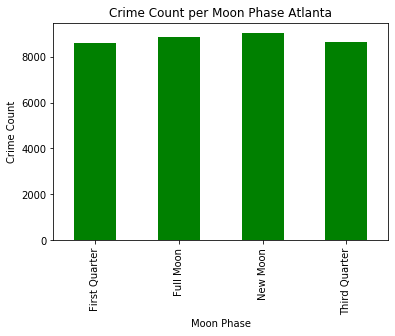

In [177]:
crime_moon_graph = new_df.plot(kind="bar", color="green")

plt.title('Crime Count per Moon Phase Atlanta')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')

plt.savefig("BarAtl.png")


In [198]:
# Atlanta Violent vs Non-Violent Data
csv_path = "Atlanta/AtlantaCrimeCate.csv"
atl_violent_df = pd.read_csv(csv_path)
violent_df = atl_violent_df.rename(columns={"Date of Crime": "Date"})
violent_df.head()

,Date,Crime,Violent Crime,NonViolent Crime
0,1/1/15,87,30,57
1,1/10/15,71,17,54
2,1/11/15,82,23,59
3,1/12/15,95,25,70
4,1/13/15,64,26,38


In [199]:
# combine both of the csv files
Atlanta_df = pd.merge(violent_df, atl_df, how="outer", on = "Date")

Atlanta_df

,Date,Crime,Violent Crime,NonViolent Crime,Crime Count,Moon Phase,Special,Special Type
0,1/1/15,87.0,30.0,57.0,87.0,NaN,NaN,NaN
1,1/10/15,71.0,17.0,54.0,71.0,NaN,NaN,NaN
2,1/11/15,82.0,23.0,59.0,82.0,NaN,NaN,NaN
3,1/12/15,95.0,25.0,70.0,95.0,NaN,NaN,NaN
4,1/13/15,64.0,26.0,38.0,64.0,Third Quarter,n,NaN
...,...,...,...,...,...,...,...,...
361,9/6/15,98.0,20.0,78.0,98.0,NaN,NaN,NaN
362,9/7/15,98.0,29.0,69.0,98.0,NaN,NaN,NaN
363,9/8/15,105.0,35.0,70.0,105.0,NaN,NaN,NaN
364,9/9/15,88.0,22.0,66.0,88.0,NaN,NaN,NaN


In [213]:
violent = Atlanta_df.groupby(['Moon Phase'])['Violent Crime'].mean()
NonViolent = Atlanta_df.groupby(['Moon Phase'])['NonViolent Crime'].mean()


combined_df = pd.DataFrame({"Violent Crime " : violent,
                           "NonViolent Crime" : NonViolent})
combined_df

,Violent Crime,NonViolent Crime
Moon Phase,,
First Quarter,23.916667,58.166667
Full Moon,23.846154,59.307692
New Moon,23.666667,58.583333
Third Quarter,22.000000,61.416667


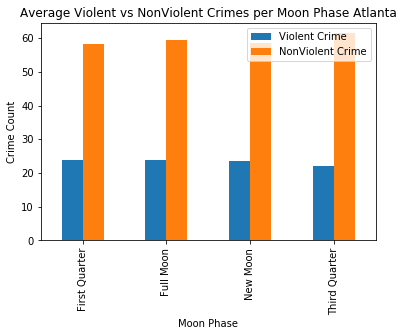

In [223]:
violent_moon_graph = combined_df.plot(kind="bar")

plt.title('Average Violent vs NonViolent Crimes per Moon Phase Atlanta')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')
plt.legend(loc = "best")

plt.savefig("ViolentVsNonViolentBarAtl.png")

# Portland Data

In [261]:
# Portlabd Data
csv_path = "Resources/pdxMoon.csv"
pdx_df = pd.read_csv(csv_path)
pdx_df.head()

,Date,Crime Count,Moon Phase,Special,Special Type
0,1/1/2015,44.0,NaN,NaN,NaN
1,1/10/2015,1.0,NaN,NaN,NaN
2,1/11/2015,3.0,NaN,NaN,NaN
3,1/12/2015,2.0,NaN,NaN,NaN
4,1/13/2015,3.0,Third Quarter,n,NaN


In [161]:
pdx_df["Moon Phase"].value_counts()

Full Moon        13
Third Quarter    12
First Quarter    12
New Moon         12
Name: Moon Phase, dtype: int64

In [148]:
new_df = pdx_df.groupby(['Moon Phase'])['Crime Count'].mean()
new_df

Moon Phase
First Quarter    1245.0
Full Moon        1360.0
New Moon         1269.0
Third Quarter    1174.0
Name: Crime Count, dtype: float64

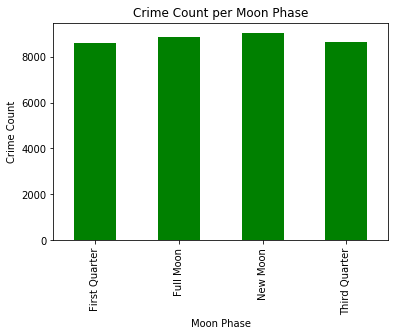

In [178]:
crime_moon_graph = new_df.plot(kind="bar", color="green")

plt.title('Crime Count per Moon Phase Portland')
plt.title('Crime Count per Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')

plt.savefig("BarPdx.png")

In [252]:
# Portland Violent vs Non-Violent Data
csv_path = "Portland/PortlandCrimeCate.csv"
pdx_violent_df = pd.read_csv(csv_path)
violent_df = pdx_violent_df.rename(columns={"Occur Date": "Date"})
violent_df.head()

,Date,Offense Type,Violent Crime,NonViolent Crime
0,1/1/2015,44,11.0,33.0
1,1/10/2015,1,0.0,1.0
2,1/11/2015,3,0.0,3.0
3,1/12/2015,2,1.0,1.0
4,1/13/2015,3,1.0,2.0


In [262]:
# combine both of the csv files

Portland_df = pd.merge(violent_df,pdx_df, how="outer", on = "Date")

Portland_df

,Date,Offense Type,Violent Crime,NonViolent Crime,Crime Count,Moon Phase,Special,Special Type
0,1/1/2015,44.0,11.0,33.0,44.0,NaN,NaN,NaN
1,1/10/2015,1.0,0.0,1.0,1.0,NaN,NaN,NaN
2,1/11/2015,3.0,0.0,3.0,3.0,NaN,NaN,NaN
3,1/12/2015,2.0,1.0,1.0,2.0,NaN,NaN,NaN
4,1/13/2015,3.0,1.0,2.0,3.0,Third Quarter,n,NaN
...,...,...,...,...,...,...,...,...
348,9/7/2015,148.0,41.0,107.0,148.0,NaN,NaN,NaN
349,9/8/2015,162.0,34.0,128.0,162.0,NaN,NaN,NaN
350,9/9/2015,147.0,35.0,112.0,147.0,NaN,NaN,NaN
351,1/26/2015,NaN,NaN,NaN,NaN,First Quarter,n,NaN


In [263]:
violent = Portland_df.groupby(['Moon Phase'])['Violent Crime'].mean()
NonViolent = Portland_df.groupby(['Moon Phase'])['NonViolent Crime'].mean()


combined_df = pd.DataFrame({"Violent Crime " : violent,
                           "NonViolent Crime" : NonViolent})
combined_df

,Violent Crime,NonViolent Crime
Moon Phase,,
First Quarter,26.454545,86.727273
Full Moon,26.384615,78.230769
New Moon,23.583333,82.166667
Third Quarter,24.666667,73.166667


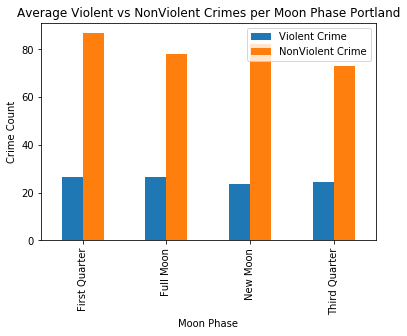

In [270]:
violent_moon_graph = combined_df.plot(kind="bar")

plt.title('Average Violent vs NonViolent Crimes per Moon Phase Portland')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')
plt.legend(loc = "best")

plt.savefig("ViolentVsNonViolentBarPdx.png")

# Chicago Data

In [162]:
#Chicago Data

csv_path = "chiMoon.csv"
chi_df = pd.read_csv(csv_path)
chi_df.head()

,Date,Crime Count,Moon Phase,Special,Special Type
0,1/1/15,1201.0,NaN,NaN,NaN
1,1/10/15,646.0,NaN,NaN,NaN
2,1/11/15,648.0,NaN,NaN,NaN
3,1/12/15,607.0,NaN,NaN,NaN
4,1/13/15,611.0,Third Quarter,n,NaN


In [163]:
chi_df["Moon Phase"].value_counts()

Full Moon        13
Third Quarter    12
First Quarter    12
New Moon         12
Name: Moon Phase, dtype: int64

In [164]:
new_df = chi_df.groupby(['Moon Phase'])['Crime Count'].mean()
new_df

Moon Phase
First Quarter    8592.0
Full Moon        8829.0
New Moon         9009.0
Third Quarter    8632.0
Name: Crime Count, dtype: float64

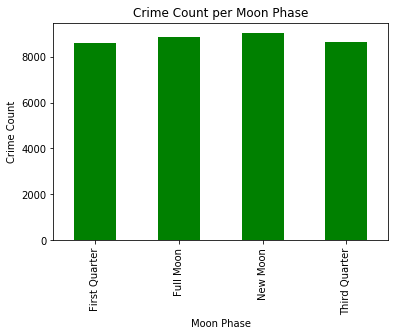

In [179]:
crime_moon_graph = new_df.plot(kind="bar", color="green")

plt.title('Crime Count per Moon Phase Chicago')
plt.title('Crime Count per Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')

plt.savefig("BarChi.png")

In [269]:
# Portland Violent vs Non-Violent Data
csv_path = "Resources/clean_chi.csv"
chi_violent_df = pd.read_csv(csv_path)
violent_df = chi_violent_df.rename(columns={"Occur Date": "Date"})
violent_df.head()

,Date,Classification
0,12/31/15,Non-Violent
1,12/31/15,Violent
2,12/31/15,Violent
3,12/31/15,Non-Violent
4,12/31/15,Violent


In [ ]:
# combine both of the csv files
Chicago_df = pd.merge(violent_df,chi_df, how="outer", on = "Date")

Chi_df

In [ ]:
violent = Portland_df.groupby(['Moon Phase'])['Violent Crime'].mean()
NonViolent = Portland_df.groupby(['Moon Phase'])['NonViolent Crime'].mean()


combined_df = pd.DataFrame({"Violent Crime " : violent,
                           "NonViolent Crime" : NonViolent})
combined_df

In [ ]:
violent_moon_graph = combined_df.plot(kind="bar")

plt.title('Average Violent vs NonViolent Crimes per Moon Phase Chicago')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')
plt.legend(loc = "best")

plt.savefig("ViolentVsNonViolentBarPdx.png")

In [151]:
# NASA Data
csv_path = "NASAmeans"
nasa_df = pd.read_csv(csv_path)

nasa_df

,day,phase
0,01 Apr,91.903333
1,01 Aug,98.278750
2,01 Dec,67.615417
3,01 Feb,94.082500
4,01 Jan,85.044000
...,...,...
360,31 Jan,88.698750
361,31 Jul,99.752500
362,31 Mar,86.065417
363,31 May,94.723750


In [152]:
day = nasa_df.day.str[0:2]
month = nasa_df.day.str[3:6]
nasa_df['Day'] = day
nasa_df['Mon'] = month
nasa_df

,day,phase,Day,Mon
0,01 Apr,91.903333,01,Apr
1,01 Aug,98.278750,01,Aug
2,01 Dec,67.615417,01,Dec
3,01 Feb,94.082500,01,Feb
4,01 Jan,85.044000,01,Jan
...,...,...,...,...
360,31 Jan,88.698750,31,Jan
361,31 Jul,99.752500,31,Jul
362,31 Mar,86.065417,31,Mar
363,31 May,94.723750,31,May


In [153]:
nasa_df.loc[nasa_df['Mon'] == 'Jan', 'Month'] = 'January'  
nasa_df.loc[nasa_df['Mon'] == 'Feb', 'Month'] = 'February'  
nasa_df.loc[nasa_df['Mon'] == 'Mar', 'Month'] = 'March'  
nasa_df.loc[nasa_df['Mon'] == 'Apr', 'Month'] = 'April'  
nasa_df.loc[nasa_df['Mon'] == 'May', 'Month'] = 'May'  
nasa_df.loc[nasa_df['Mon'] == 'Jun', 'Month'] = 'June'  
nasa_df.loc[nasa_df['Mon'] == 'Jul', 'Month'] = 'July'  
nasa_df.loc[nasa_df['Mon'] == 'Aug', 'Month'] = 'August'  
nasa_df.loc[nasa_df['Mon'] == 'Sep', 'Month'] = 'Spetember'  
nasa_df.loc[nasa_df['Mon'] == 'Oct', 'Month'] = 'October'  
nasa_df.loc[nasa_df['Mon'] == 'Nov', 'Month'] = 'November'  
nasa_df.loc[nasa_df['Mon'] == 'Dec', 'Month'] = 'December'  
nasa_df

date = day + '/' + month +  "/" + "15"

nasa_df['Date'] = date

nasa_df['Date'] = pd.to_datetime(nasa_df.Date)
nasa_df['Date'] = nasa_df['Date'].dt.strftime('%m/%d/%Y')
nasa_df.Date = nasa_df.Date.str.replace('2015', '15')
nasa_df.Date = nasa_df.Date.str.replace('01', '1')
nasa_df.Date = nasa_df.Date.str.replace('02', '2')
nasa_df.Date = nasa_df.Date.str.replace('03', '3')
nasa_df.Date = nasa_df.Date.str.replace('04', '4')
nasa_df.Date = nasa_df.Date.str.replace('05', '5')
nasa_df.Date = nasa_df.Date.str.replace('06', '6')
nasa_df.Date = nasa_df.Date.str.replace('07', '7')
nasa_df.Date = nasa_df.Date.str.replace('08', '8')
nasa_df.Date = nasa_df.Date.str.replace('09', '9')



nasa_cleaned = pd.DataFrame({"Moon Phase": nasa_df['phase'],
                            "Date": nasa_df['Date']})

nasa_cleaned.head()
# Export as csv
nasa_cleaned.to_csv("nasa_cleaned.csv")

In [154]:
crime_moon_atl = pd.merge(nasa_cleaned, atl_df, how="outer", on = "Date")

crime_moon_atl

,Moon Phase_x,Date,Crime Count,Moon Phase_y,Special,Special Type
0,91.903333,4/1/15,97.0,NaN,NaN,NaN
1,98.278750,8/1/15,101.0,NaN,NaN,NaN
2,67.615417,12/1/15,83.0,NaN,NaN,NaN
3,94.082500,2/1/15,79.0,NaN,NaN,NaN
4,85.044000,1/1/15,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...
361,99.752500,7/31/15,97.0,Full Moon,y,Blue Moon
362,86.065417,3/31/15,57.0,NaN,NaN,NaN
363,94.723750,5/31/15,71.0,NaN,NaN,NaN
364,79.571667,10/31/15,100.0,NaN,NaN,NaN


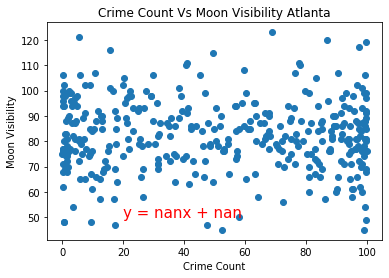

<Figure size 432x288 with 0 Axes>

In [181]:
# Crime Count Vs Visible Moon Atl (%) Linear Regression
y_values = crime_moon_df['Crime Count']
x_values = crime_moon_df['Moon Phase_x']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.title('Crime Count Vs Moon Visibility Atlanta')
plt.ylabel("Moon Visibility")
plt.xlabel("Crime Count")
plt.show()

plt.savefig("CrimeVsMoonAtl.png")

In [156]:
date_pdx = pd.DataFrame(nasa_cleaned.Date.str.replace('15', '2015'))
nasa_pdx = pd.DataFrame({"Moon Phase": nasa_df['phase'],
                            "Date": date_pdx['Date']})
nasa_pdx

,Moon Phase,Date
0,91.903333,4/1/2015
1,98.278750,8/1/2015
2,67.615417,12/1/2015
3,94.082500,2/1/2015
4,85.044000,1/1/2015
...,...,...
360,88.698750,1/31/2015
361,99.752500,7/31/2015
362,86.065417,3/31/2015
363,94.723750,5/31/2015


In [157]:
crime_moon_pdx = pd.merge(nasa_pdx, pdx_df, how="outer", on = "Date")
crime_moon_pdx

,Moon Phase_x,Date,Crime Count,Moon Phase_y,Special,Special Type
0,91.903333,4/1/2015,31.0,NaN,NaN,NaN
1,98.278750,8/1/2015,158.0,NaN,NaN,NaN
2,67.615417,12/1/2015,188.0,NaN,NaN,NaN
3,94.082500,2/1/2015,18.0,NaN,NaN,NaN
4,85.044000,1/1/2015,44.0,NaN,NaN,NaN
...,...,...,...,...,...,...
373,NaN,6/15/2015,162.0,NaN,NaN,NaN
374,NaN,7/15/2015,156.0,New Moon,n,NaN
375,NaN,8/15/2015,140.0,NaN,NaN,NaN
376,NaN,9/15/2015,146.0,NaN,NaN,NaN


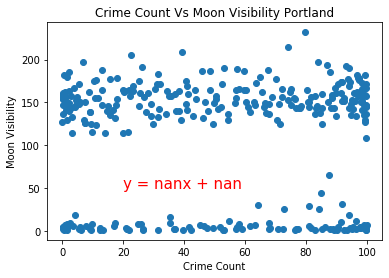

<Figure size 432x288 with 0 Axes>

In [182]:
# Crime Count Vs Visible Moon Pdx (%) Linear Regression
y_values = crime_moon_pdx['Crime Count']
x_values = crime_moon_pdx['Moon Phase_x']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.title('Crime Count Vs Moon Visibility Portland')
plt.ylabel("Moon Visibility")
plt.xlabel("Crime Count")
plt.show()

plt.savefig("CrimeVsMoonPdx.png")

In [176]:
### Heading

In [166]:
crime_moon_chi = pd.merge(nasa_cleaned, chi_df, how="outer", on = "Date")

crime_moon_chi

,Moon Phase_x,Date,Crime Count,Moon Phase_y,Special,Special Type
0,91.903333,4/1/15,923.0,NaN,NaN,NaN
1,98.278750,8/1/15,1036.0,NaN,NaN,NaN
2,67.615417,12/1/15,786.0,NaN,NaN,NaN
3,94.082500,2/1/15,555.0,NaN,NaN,NaN
4,85.044000,1/1/15,1201.0,NaN,NaN,NaN
...,...,...,...,...,...,...
361,99.752500,7/31/15,779.0,Full Moon,y,Blue Moon
362,86.065417,3/31/15,693.0,NaN,NaN,NaN
363,94.723750,5/31/15,666.0,NaN,NaN,NaN
364,79.571667,10/31/15,721.0,NaN,NaN,NaN


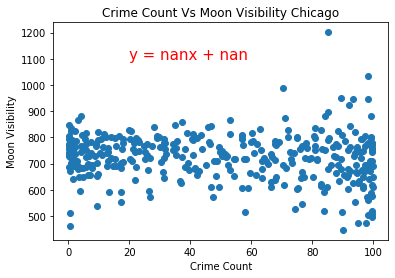

<Figure size 432x288 with 0 Axes>

In [183]:
# Crime Count Vs Visible Moon Chi (%) Linear Regression
y_values = crime_moon_chi['Crime Count']
x_values = crime_moon_chi['Moon Phase_x']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(20,1100),fontsize=15,color="red")

plt.title('Crime Count Vs Moon Visibility Chicago')
plt.ylabel("Moon Visibility")
plt.xlabel("Crime Count")
plt.show()

plt.savefig("CrimeVsMoonchi.png")